In [1]:
import glob
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import scipy

In [2]:
subfolders = ["BirdVox-pcen", "SONYC-pcen"]
data_dir = '/beegfs/vl1019/spl2018_datasets'

settings = {
    "fmin": 0,
    "fmax": 10000,
    "hop_length": 1024,
    "n_fft": 2048,
    "n_mels": 128,
    "sr": 22050,
    "win_length": 2048,
    "window": "hann",
    "T": 0.05,#0.395,
    "alpha": 0.98,
    "delta": 2.0,
    "r": 0.5,
    "eps": 1e-10}


# 

In [ ]:
subfolder_id = 1
log_E_list = []
BC_list = []
PCEN_list = []


subfolder_str = subfolders[subfolder_id]
subfolder_dir = os.path.join(data_dir, subfolder_str)
wav_names = list(glob.glob(os.path.join(subfolder_dir, "*.wav")))
wav_paths = sorted([os.path.join(subfolder_dir, x) for x in wav_names])
n_files = len(wav_paths)

for file_id in range(n_files):
    wav_path = wav_paths[file_id]
    waveform, fs = librosa.load(wav_path, sr=22050)


    # Compute Short-Term Fourier Transform (STFT).
    stft = librosa.stft(
        waveform,
        n_fft=settings["n_fft"],
        win_length=settings["win_length"],
        hop_length=settings["hop_length"],
        window=settings["window"])


    # Compute squared magnitude coefficients.
    abs2_stft = (stft.real*stft.real) + (stft.imag*stft.imag)


    # Gather frequency bins according to the Mel scale.
    E = librosa.feature.melspectrogram(
        y=None,
        S=abs2_stft,
        sr=settings["sr"],
        n_fft=settings["n_fft"],
        n_mels=settings["n_mels"],
        htk=True,
        fmin=settings["fmin"],
        fmax=settings["fmax"])

    PCEN = librosa.pcen(
        S=E,
        time_constant=settings["T"],
        sr=settings["sr"],
        hop_length=settings["hop_length"],
        gain=settings["alpha"],
        power=settings["r"],
        bias=settings["delta"],
        eps=settings["eps"])


    E_ravel = E.ravel()
    log_E_ravel = np.log(E_ravel)
    BC_ravel, lmbda = scipy.stats.boxcox(E_ravel)
    BC = scipy.stats.boxcox(E, lmbda=lmbda)
    print(lmbda)
    PCEN_ravel = PCEN.ravel()


    log_E_list.append(log_E_ravel)
    BC_list.append(BC_list)
    PCEN_list.append(PCEN_ravel)


log_E_ravel = np.array(log_E_list)
BC_ravel = np.array(BC_list)
PCEN_ravel = np.array(PCEN_list)
    
    
%matplotlib inline
fig = plt.figure()
xgauss = np.linspace(-4, 4, 100)
hist_x = plt.hist(
    (log_E_ravel - np.mean(log_E_ravel)) / np.std(log_E_ravel),
    bins=xgauss);

hist_step = np.diff(hist_x[1])[0]
gaussmax = len(E_ravel)/np.sqrt(2*np.pi) * hist_step
ygauss = gaussmax * np.exp(-(xgauss*xgauss)/2)
plt.plot(xgauss, ygauss, '--', color="#E67300", linewidth=4.0)
plt.xlim([-4,4])
plt.ylim([0, gaussmax*2])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(labelleft="off", left="off")
fig.savefig('logE_histogram.eps', transparent=True, bbox_inches="tight")

fig = plt.figure()
plt.hist((BC_ravel - np.mean(BC_ravel)) / np.std(BC_ravel), bins=xgauss);
plt.plot(xgauss, ygauss, '--', color="#E67300", linewidth=4.0)
plt.xlim([-4,4])
plt.ylim([0, gaussmax*2])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(labelleft="off", left="off")
fig.savefig('BC_histogram.eps', transparent=True, bbox_inches="tight")

fig = plt.figure(frameon=False)
plt.hist((PCEN_ravel - np.mean(PCEN_ravel)) / np.std(PCEN_ravel), bins=xgauss);
plt.plot(xgauss, ygauss, '--', color="#E67300", linewidth=4.0)
plt.xlim([-4,4])
plt.ylim([0, gaussmax*2])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(labelleft="off", left="off")
fig.savefig('PCEN_histogram.eps', transparent=True, bbox_inches="tight")

-0.0129074122369
-0.0199414617838
-0.0369728245156
-0.0100410195258
-0.0284476701209
-0.0115452197859
-0.00687710184139
-0.0373354147304
-0.0402990189229
-0.0589688116982
-0.0152372921512
-0.0485838584153
0.0189644585499
0.0233563759394
-0.00872158637056
-0.0643348965037
-0.0642417703329
-0.0593570322911
-0.116814520366
0.0186532418169
0.0136672274537
0.0719065381488
-0.0131665399345
-0.0294965315016
-0.0478088775124
-0.136352596201
-0.0850128494267
-0.191528314398
0.0286849055593
0.10642901122
-0.0637259676214
0.0370515083429
-0.0296046127619
-0.00957424826743
0.0304162520685
0.0350595745043
-0.00582413493683
-0.070276503918
-0.0694004084788
-0.10469887316
0.0175678554813
-0.0222356002127
0.0152957301215
0.0384731510825
-0.0428547904914
-0.0376807349385
-0.0255578201184
0.0119868022057
-7.22341992622e-05
-0.127061477585
-0.0838158179118
0.000514425683292
-0.0211085616717
-0.01382243613
-0.0205312805711
-0.00208139086499
-0.0121522223525
-0.00940300863369
0.0499415781669
-0.05754222431

In [ ]:
log_E_ravel

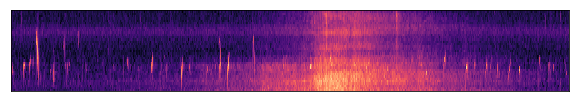

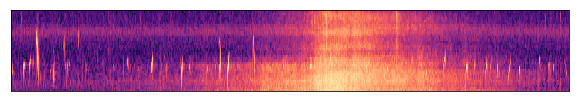

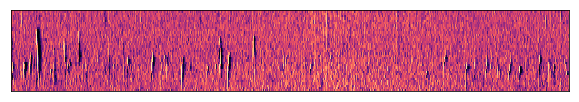

In [352]:
figsize = (10,1.5)
melmin = 65
melmax = 100
tmin = 100

fig = plt.figure(figsize=figsize)
librosa.display.specshow(np.log10(E[melmin:melmax,tmin:]))
fig.savefig('logE_spectrogram.eps', transparent=True, bbox_inches="tight")

fig = plt.figure(figsize=figsize)
librosa.display.specshow(BC[melmin:melmax,tmin:])
fig.savefig('BC_spectrogram.eps', transparent=True, bbox_inches="tight")

fig = plt.figure(figsize=figsize)
librosa.display.specshow(PCEN[melmin:melmax,tmin:])
fig.savefig('PCEN_spectrogram.eps', transparent=True, bbox_inches="tight")

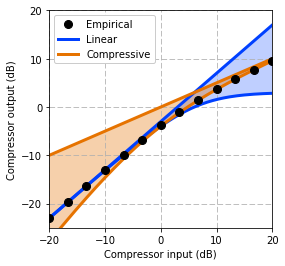

In [197]:
power = 0.5
bias = 1.0

G = np.logspace(-2, 4, 181)
PCEN = (G + bias)**power - bias**power

figsize = (4, 4)

fig = plt.figure(figsize=figsize)

min_G = 10**(-2.0)
max_G = 10**(+2.0)


legend_linear, = plt.plot(
    10*np.log10(G),
    10*np.log10(G * bias**(power-1) * power),
    color="#0040FF",
    label="Linear",
    linewidth=3.0)

plt.plot(
    10*np.log10(G),
    10*np.log10(np.maximum(1e-10, G * bias**(power-1) * power / (1 + (1-power)/2 * G))),
    color="#0040FF",
    linewidth=3.0)

plt.fill_between(
    10*np.log10(G),
    10*np.log10(G * bias**(power-1) * power),
    10*np.log10(np.maximum(1e-10, G * bias**(power-1) * power / (1 + (1-power)/2 * G))),
    alpha = 0.25,
    color="#0040FF")

legend_compressive, = plt.plot(
    10*np.log10(G),
    10*np.log10(G ** power),
    color="#E67300",
    label="Compressive",
    linewidth=3.0)

plt.plot(
    10*np.log10(G),
    10*np.log10(np.maximum(1e-10, G**power /
                        (1 + bias/G * (power + (G/bias)**(1-power))))),
    color="#E67300",
    linewidth=3.0)

plt.fill_between(
    10*np.log10(G),
    10*np.log10(np.maximum(1e-10, G**power /
                        (1 + bias/G * (power + (G/bias)**(1-power))))),
    10*np.log10(G ** power),
    alpha = 0.33,
    color="#E67300"
)

legend_empirical, = plt.plot(
    10*np.log10(G[::10]),
    10*np.log10(PCEN[::10]),
    'o',
    color='k',
    markersize=8.0,
    label="Empirical");

fig.axes[0].grid(linestyle='--')

leg = plt.legend(
    handles=[legend_empirical, legend_linear, legend_compressive])
leg.get_frame().set_alpha(1)

plt.xlabel("Compressor input (dB)")
plt.ylabel("Compressor output (dB)")

plt.xlim([-20, 20])
plt.xticks([-20, -10, 0, 10, 20])
plt.ylim([-25, 15])
plt.yticks([-20, -10, 0, 10, 20])

fig.savefig('bode_compressor.png',
            transparent=True, bbox_inches="tight", dpi=1000)

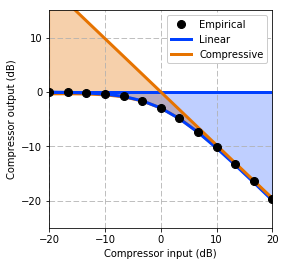

In [198]:
eps = 1.0
M = eps * np.logspace(-2, 2, 13)
denom = (M + eps)**(-gain)

fig = plt.figure(figsize=figsize)

plt.plot(
    10*np.log10(M),
    10*np.log10(np.maximum(1e-10,M**(-gain) / (1 + gain*eps/M))),
    color="#E67300",
    linewidth=3.0)
plt.fill_between(
    10*np.log10(M),
    10*np.log10(M**(-gain)),
    10*np.log10(np.maximum(1e-10,M**(-gain) / (1 + gain*eps/M))),
    alpha = 0.33,
    color="#E67300"
)

plt.plot(
    10*np.log10(M),
    10*np.log10(np.ones(M.size) * eps**(-gain)),
    color="#0040FF",
    linewidth=3.0)
plt.plot(
    10*np.log10(M),
    10*np.log10(np.maximum(1e-10, eps**(-gain) / (1 + gain*M/eps))),
    color="#0040FF",
    linewidth=3.0)
plt.fill_between(
    10*np.log10(M),
    10*np.log10(np.ones(M.size) * eps**(-gain)),
    10*np.log10(np.maximum(1e-10,eps**(-gain) / (1 + gain*M/eps))),
    alpha = 0.25,
    color="#0040FF"
)

plt.plot(
    10*np.log10(M),
    10*np.log10(M**(-gain)),
    color="#E67300",
    linewidth=3.0)
plt.plot(10*np.log10(M), 10*np.log10(denom),
    'o',
    color='k',
    markersize=8.0)


fig.axes[0].grid(linestyle='--')

leg = plt.legend(
    handles=[legend_empirical, legend_linear, legend_compressive])
leg.get_frame().set_alpha(1)

plt.xlabel("Compressor input (dB)")
plt.ylabel("Compressor output (dB)")

plt.xlim([-20, 20])
plt.xticks([-20, -10, 0, 10, 20])
plt.ylim([-25, 15])
plt.yticks([-20, -10, 0, 10])

fig.savefig('bode_renorm.png',
            transparent=True, bbox_inches="tight", dpi=1000)

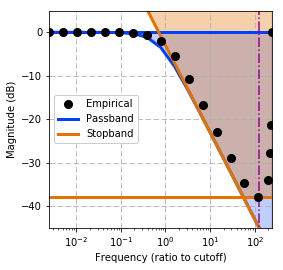

In [348]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

s = 1/40
N = 10000
ω0 = (s / np.sqrt(1-s)) / (2*np.pi)
ωc = np.arccos(1 - ω0**2/2)
ω = np.concatenate(
    (np.logspace(-5, 0, 17),
     np.array([0.78, 0.9, 0.953]))) 
π = np.pi
α = 1 - ω

#h_diff = ((2/s)/(2**2) + 1/s**2) * (2*π*ω)**2
#h_lf = h_diff + 2
#h_hf = (2/s * np.sin(2*π*ω/2)**2)**2 
#h = (1 + 2/s * np.sin(2*π*ω/2)**2)**2 + (1/s * np.sin(2*π*ω))**2 the form below is simpler
#plt.loglog(ω/ω0, h_diff, '-', color="#E67300", linewidth=3.0)
#plt.loglog(ω/ω0, h_lf, '-', color="#E67300", linewidth=3.0)
#plt.fill_between(
#    ω/ω0, h_diff, h_lf, alpha = 0.33, color="#E67300")
#plt.plot(ω/ω0, np.minimum(h_diff, h_hf), '-', color="#E67300", linewidth=3.0)
#plt.fill_between(
#    ω/ω0, h_hf, h_diff, alpha = 0.33, color="#E67300")


h = s**2 / (s**2 + 2 * (1-s) * (1-np.cos(2*π*ω)))
h_lfinf = np.ones(ω.size)
h_lfsup = s**2 / (s**2 + 2 * (1-s) * (2*π*ω)**2)
h_hfinf = s**2 / (2 * (1-s) * (2*π*ω)**2)
h_hfsup = s**2 / (s**2 + 4 * (1-s)) * np.ones(ω.size)
#h_hfsup = 1 + 4*(1+s)/(s**2) * (π*ω)**2

fig = plt.figure(figsize=figsize)


legend_passband, = plt.semilogx(ω/ω0, 10*np.log10(h_lfsup), '-',
    color="#0040FF", linewidth=3.0, label="Passband")
plt.semilogx(ω/ω0, 10*np.log10(h_lfinf), '-', color="#0040FF", linewidth=3.0)
plt.fill_between(
    ω/ω0,
    10*np.log10(h_lfinf), 10*np.log10(h_lfsup),
    alpha = 0.25, color="#0040FF")

legend_stopband, = plt.semilogx(ω/ω0, 10*np.log10(h_hfinf), '-',
    color="#E67300", linewidth=3.0, label="Stopband")
plt.semilogx(ω/ω0, 10*np.log10(h_hfsup), '-', color="#E67300", linewidth=3.0)
plt.fill_between(
    ω/ω0, 10*np.log10(np.maximum(h_hfinf, h_hfsup)), 10 * np.ones(ω.size), alpha = 0.33, color="#E67300")

plt.plot([0.5/ω0, 0.5 /ω0], [-1e6, 1e6], '-.', color='#990099')

plt.semilogx(ω/ω0, 10*np.log10(h), 'o', color='k', markersize=8.0)

leg = plt.legend(
    handles=[legend_empirical, legend_passband, legend_stopband])
leg.get_frame().set_alpha(1)


fig.axes[0].grid(linestyle='--')

plt.xlim([np.max(ω/ω0)*1e-5, np.max(ω/ω0)])
plt.ylim([-45, 5])
plt.yticks([-40, -30, -20, -10, 0])

plt.xlabel("Frequency (ratio to cutoff)")
plt.ylabel("Magnitude (dB)")

fig.savefig('frequency_response.png',
            transparent=True, bbox_inches="tight", dpi=1000)

In [341]:
legend_passband

In [320]:
ω = np.array(sorted(ω))

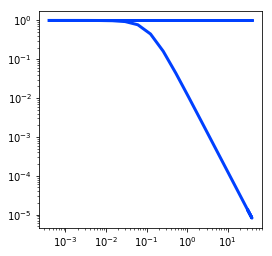

In [269]:

s = 1/40
N = 10000
ω0 = s / np.sqrt(1-s)
ωc = np.arccos(1 - ω0**2/2)
ω = np.concatenate(
    (np.logspace(-5, 0, 17),
     np.array([0.78, 0.9, 0.953]))) 
π = np.pi
α = 1 - ω

#h_diff = ((2/s)/(2**2) + 1/s**2) * (2*π*ω)**2
#h_lf = h_diff + 2
#h_hf = (2/s * np.sin(2*π*ω/2)**2)**2 
#h = (1 + 2/s * np.sin(2*π*ω/2)**2)**2 + (1/s * np.sin(2*π*ω))**2 the form below is simpler
#plt.loglog(ω/ω0, h_diff, '-', color="#E67300", linewidth=3.0)
#plt.loglog(ω/ω0, h_lf, '-', color="#E67300", linewidth=3.0)
#plt.fill_between(
#    ω/ω0, h_diff, h_lf, alpha = 0.33, color="#E67300")
#plt.plot(ω/ω0, np.minimum(h_diff, h_hf), '-', color="#E67300", linewidth=3.0)
#plt.fill_between(
#    ω/ω0, h_hf, h_diff, alpha = 0.33, color="#E67300")


h = s**2 / (s**2 + 2 * (1-s) * (1-np.cos(2*π*ω)))
h_lfinf = np.ones(ω.size)
h_lfsup = s**2 / (s**2 + 2 * (1-s) * (2*π*ω)**2)

fig = plt.figure(figsize=figsize)


plt.loglog(ω/ω0, h_lfsup, '-', color="#0040FF", linewidth=3.0)
plt.loglog(ω/ω0, h_lfinf, '-', color="#0040FF", linewidth=3.0)
#plt.fill_between(
#    ω/ω0, h_lfinf, h_lfsup, alpha = 0.25, color="#0040FF")

#plt.loglog(ω/ω0, h_hfinf, '-', color="#E67300", linewidth=3.0)
#plt.loglog(ω/ω0, h_hfsup, '-', color="#E67300", linewidth=3.0)
#plt.fill_between(
#    ω/ω0, h_hfinf, h_hfsup, alpha = 0.33, color="#E67300")

plt.semilogx(ω/ω0, 10*np.log10(h),
    'o', color='k', markersize=8.0)

In [206]:
np.arccos

<ufunc 'arccos'>